# Análise dos dados de acervo das bibliotecas da UFRN

In [26]:
import re
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

## Junção dos datasets

In [2]:
# Arquivos da pasta de datasets
files = listdir('data')
# Regex para cada tipo de dataset que possui vários arquivos
regex = {
    'discentes': re.compile(r'discentes-20[0-9]{2}'),
    'emprestimos': re.compile(r'emprestimos-20[0-9]{3}'),
}
# Filtros aplicados, lista de arquivos que satisfazem os regex
files_filter = {
    'discentes': list(filter(regex['discentes'].search, files)),
    'emprestimos': list(filter(regex['emprestimos'].search, files)),
}
# Mostra ambas as listas de arquivos
print(files_filter)

{'discentes': ['discentes-2012.csv', 'discentes-2017.csv', 'discentes-2013.csv', 'discentes-2010.csv', 'discentes-2018.csv', 'discentes-2014.csv', 'discentes-2015.csv', 'discentes-2016.csv', 'discentes-2009.csv', 'discentes-2011.csv'], 'emprestimos': ['emprestimos-20111.csv', 'emprestimos-20172.csv', 'emprestimos-20021.csv', 'emprestimos-20012.csv', 'emprestimos-20141.csv', 'emprestimos-20081.csv', 'emprestimos-20132.csv', 'emprestimos-20152.csv', 'emprestimos-20061.csv', 'emprestimos-20131.csv', 'emprestimos-20042.csv', 'emprestimos-20091.csv', 'emprestimos-20162.csv', 'emprestimos-20051.csv', 'emprestimos-20002.csv', 'emprestimos-20022.csv', 'emprestimos-20161.csv', 'emprestimos-20121.csv', 'emprestimos-20071.csv', 'emprestimos-20151.csv', 'emprestimos-20122.csv', 'emprestimos-20092.csv', 'emprestimos-20052.csv', 'emprestimos-20171.csv', 'emprestimos-20031.csv', 'emprestimos-20142.csv', 'emprestimos-20112.csv', 'emprestimos-20101.csv', 'emprestimos-20032.csv', 'emprestimos-20062.csv'

In [3]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Variável com os dataframes que iremos usar
dfs = {
    'discentes': make_df(files_filter['discentes']),
    'emprestimos': make_df(files_filter['emprestimos']),
    'cursos': pd.read_csv('data/cursos-ufrn.csv', sep=';'),
    'exemplares': pd.read_csv('data/exemplares.csv', sep=';')
}

In [8]:
dfs['emprestimos']['data_emprestimo'] = pd.to_datetime(dfs['emprestimos']['data_emprestimo'])

In [15]:
dfs['emprestimos'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558703 entries, 0 to 2558702
Data columns (total 8 columns):
id_emprestimo           int64
codigo_barras           object
data_renovacao          object
data_emprestimo         datetime64[ns]
data_devolucao          object
nome_usuario            object
id_vinculo_usuario      float64
tipo_vinculo_usuario    object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 156.2+ MB


In [10]:
dfs['emprestimos'].head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,nome_usuario,id_vinculo_usuario,tipo_vinculo_usuario
0,920246,Y019450,NaN,2011-01-03 08:08:18.986,2011-01-14 08:36:10,EDMILSON BEZERRA DA SILVA,533189.0,ALUNO DE GRADUAÇÃO
1,920247,Y020420,NaN,2011-01-03 08:08:19.077,2011-01-14 08:36:27,EDMILSON BEZERRA DA SILVA,533189.0,ALUNO DE GRADUAÇÃO
2,920248,S020100,2011-01-17 23:31:17.992,2011-01-03 08:48:20.360,2011-01-18 12:37:26,CARLOS LEONARDO MACIEL DE ARAUJO,5751844.0,SERVIDOR TÉCNICO-ADMINISTRATIVO
3,920249,S024844,2011-01-17 23:31:17.944,2011-01-03 08:48:20.433,2011-02-07 17:46:44,CARLOS LEONARDO MACIEL DE ARAUJO,5751844.0,SERVIDOR TÉCNICO-ADMINISTRATIVO
4,920250,S026026,2011-01-17 23:31:17.915,2011-01-03 08:48:20.483,2011-01-18 12:37:43,CARLOS LEONARDO MACIEL DE ARAUJO,5751844.0,SERVIDOR TÉCNICO-ADMINISTRATIVO


In [61]:
# Coluna do mês do emprestimo
dfs['emprestimos']['mes_emprestimo'] = dfs['emprestimos']['data_emprestimo'].dt.month
# Contagem de emprestimos por mês
mes_count = dfs['emprestimos'].groupby('mes_emprestimo')['id_emprestimo'].count()
# Labels de cada mês
labels = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril',
    'Maio', 'Junho', 'Julho', 'Agosto',
    'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]

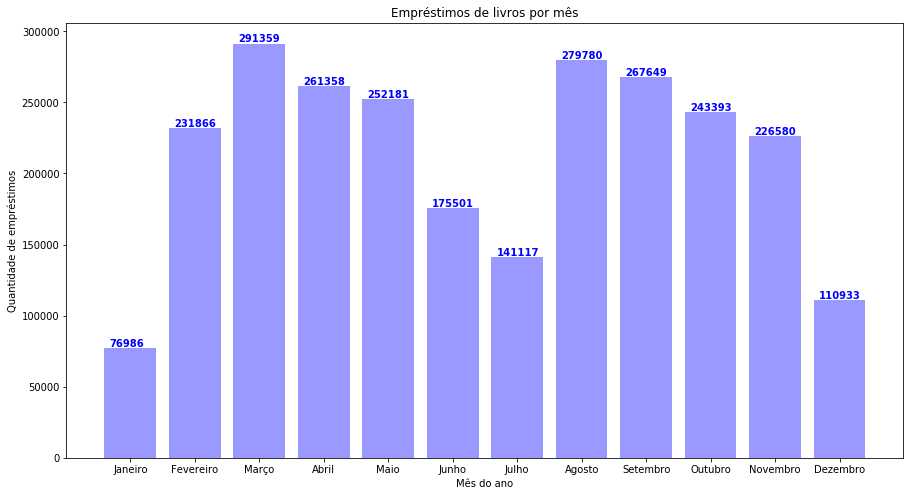

In [62]:
# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

# Barra dos que possuem o auxílio
plt.bar(mes_count.keys(), mes_count.values, alpha=0.4, color='b')

# Valores
for index, value in enumerate(mes_count):
    plt.text((index+0.68), (value+1000), str(value), color='blue', fontweight='bold')
    
# Demais configurações do gráfico
plt.xlabel('Mês do ano')
plt.ylabel('Quantidade de empréstimos')
plt.title('Empréstimos de livros por mês')
plt.xticks(list(mes_count.keys()), labels)

# Exibimos todos os gráficos de uma só vez
plt.show()